# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [0]:
%matplotlib inline

from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip3 install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl
!pip3 install torchvision
!pip3 install pyro-ppl

import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

    100% |████████████████████████████████| 79.1MB 67.1MB/s 
pyro-ppl 0.3.1.post1 has requirement torch>=1.0.0, but you'll have torch 0.4.0 which is incompatible.
fastai 1.0.46 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.46 has requirement torch>=1.0.0, but you'll have torch 0.4.0 which is incompatible.
  Using cached https://files.pythonhosted.org/packages/31/ca/dd2c64f8ab5e7985c4af6e62da933849293906edcdb70dac679c93477733/torch-1.0.1.post2-cp36-cp36m-manylinux1_x86_64.whl
fastai 1.0.46 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: torch 0.4.0
    Uninstalling torch-0.4.0:
      Successfully uninstalled torch-0.4.0


## Generating single value from normal distribution with given mean and variance

In [0]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(-0.4324)


## Sampling from categorical probabilities with given probabilities

In [0]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(0)


## Animating data

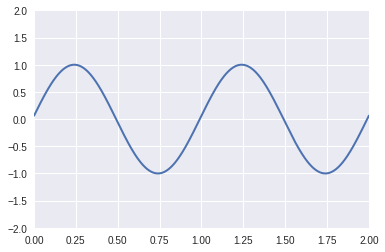

In [0]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

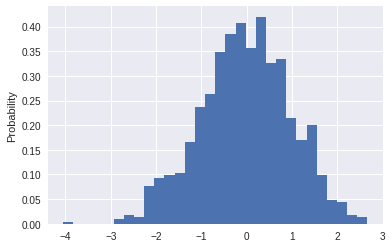

In [0]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

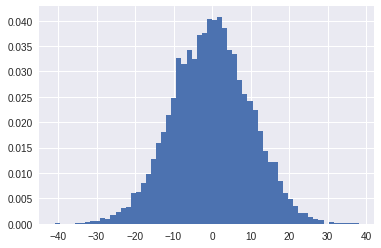

In [0]:
def getSamples(count):
    samples = []
    mean = 0
    variance = 10
    for i in range(count):
      samples.append(pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance)))
      
    return samples

def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()
    ax.set_xlim(( 0, 2))
    ax.set_ylim((-3, 3))
    
    data = getSamples(10)
    ax.hist(data, density=True, bins=60)
    
    # animation function. This is called sequentially
    def Update(i):
        ax.clear()
        ax.hist(data, density=True, bins=60)
        data.extend(getSamples(100))
        
    # initialization function: plot the background of each frame
#     def init():
#         ax.hist([], density=True, bins=30)

    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, Update,# init_func=init,
                                   frames=100, interval=100)
    return HTML(anim.to_jshtml())


animate()

## Task 2

Ill in population: 1
Bayes: 0.0009890406305883294. Experiment: 0.0009900990099009901
Ill in population: 10
Bayes: 0.00980489254233931. Experiment: 0.00980392156862745
Ill in population: 20
Bayes: 0.019423190111830486. Experiment: 0.019455252918287938
Ill in population: 30
Bayes: 0.028860169079778442. Experiment: 0.03006012024048096
Ill in population: 40
Bayes: 0.03812090874085484. Experiment: 0.038834951456310676
Ill in population: 50
Bayes: 0.047210300429184546. Experiment: 0.043478260869565216
Ill in population: 60
Bayes: 0.056133056133056115. Experiment: 0.055970149253731345
Ill in population: 70
Bayes: 0.06489371664013484. Experiment: 0.06481481481481481
Ill in population: 80
Bayes: 0.0734966592427617. Experiment: 0.07632850241545894
Ill in population: 90
Bayes: 0.08194610503081026. Experiment: 0.07929515418502203
Ill in population: 100
Bayes: 0.09024612579762989. Experiment: 0.08904719501335707


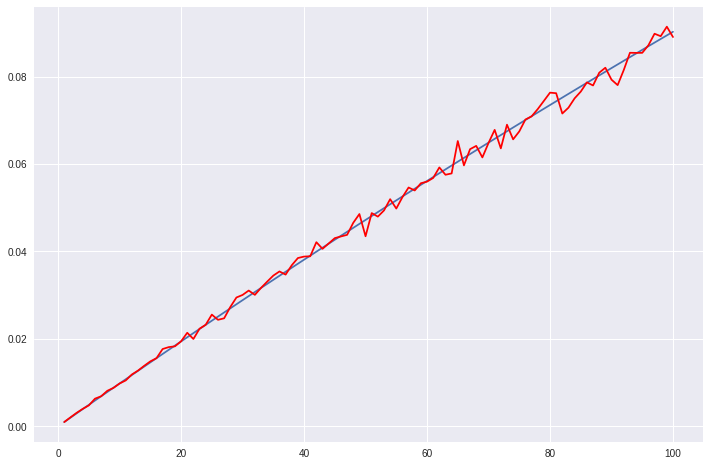

In [9]:
population_size = 50000
ill_people_amount = 1

def resultBayes():
    prob_ill = ill_people_amount / population_size
    pos_healthy = 0.02
    neg_ill = 0.01
    pos_ill = 1 - neg_ill
    neg_healthy = 1 - pos_healthy
    
    prob_pos = pos_ill * prob_ill + pos_healthy * (1-prob_ill)
    prob_ill_pos = (prob_ill * pos_ill)/prob_pos
    return prob_ill_pos

def runTheTest(isIll):
  if isIll == 0:
    testResult = pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([0.98, 0.02])))
  else:
    testResult = pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([0.01, 0.99])))
    #testResult = abs(1 - testResult)

  return testResult
    
def generatePopulation():
    population = []
    test = []
    for i in range(population_size):
        if i < ill_people_amount:
            population.append(1)
            test.append(runTheTest(1))
        else:
            population.append(0)
            test.append(runTheTest(0))
    
    return (np.array(population), np.array(test))
  
def resultSimulation():
  population, test = generatePopulation()
  testPositiveAmount = np.sum(test)
  illPeopleAmount = np.sum(population * test)
  
  return (illPeopleAmount/testPositiveAmount)

bayes = []
experiment = []
illAmount = []
for i in range(1, 101):
    ill_people_amount = i
    illAmount.append(i)
    bayes.append(resultBayes())
    experiment.append(resultSimulation())
    if(i == 1 or i % 10 == 0):
        print(f'Ill in population: {i}')
        print(f'Bayes: {bayes[i-1]}. Experiment: {experiment[i-1]}')

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(illAmount, bayes)
ax.plot(illAmount, experiment, color = 'red')
plt.show()

            